**Drenaje de Tierras Agricolas-Trabajo 2. Ciro,Ganoa,López**


Se tiene una presa cuya altura es de 20m, en la mitad se encuentra un muro de contención a una profundidad de 5m, con una longitud de 15m. Al lado derecho de la presa el nivel de agua se encuentra a 5m, y al lado izquierdo el nivel de agua es de 10m. Se debe hallar el potencial hidirico en cada uno de los nodos según la malla que se seleccione.

*La longitud de la presa asumida es asumida por nosotros*
**$$L=55m$$**
*La malla*
**$$dx=5m$$**
**$$dy=5m$$**

Con la ecuación de LaPlace y a traves de la discretización por medio de diferencias finitas se procede a solucionar el problema.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
Lx=55
Ly=20

In [4]:
#Condiciones de frontera 
H49,H50,H51,H52,H53=30,30,30,30,30 #Arriba
H54,H55= 0,0 #Arriba
H56,H57,H58,H59,H60=25,25,25,25,25 #Arriba

In [5]:
Nx=12
dx=Lx/(Nx-1)
x=np.linspace(0,Lx,Nx)

Ny=5
dy=Ly/(Ny-1)
y=np.linspace(0,Ly,Ny)

In [6]:
xmesh, ymesh=np.meshgrid(x,y,indexing='ij')
plt.scatter(xmesh,ymesh)
plt.show()

In [7]:
#Matrtices
N=Nx*Ny
A=np.zeros((N,N))
b=np.zeros(N)


In [8]:
for i in range (Nx):
    for j in range(Ny):
        n=i+j*Nx
        #Esquina 1
        if i==0 and j==0:
            A [n] [n]=1/dx**2+1/dy**2
            A [n] [n+1]=-2/dx**2
            A [n] [n+2]=1/dx**2
            A [n] [n+Nx]=-2/dy**2
            A [n] [n+2*Nx]=1/dy**2
            b [n]=0
         #Esquina 2
        elif i==Nx-1 and j==0:
            A [n] [n]=1/dx**2+1/dy**2
            A [n] [n-1]=-2/dx**2
            A [n] [n-2]=1/dx**2
            A [n] [n+Nx]=-2/dy**2
            A [n] [n+2*Nx]=1/dy**2  
            b [n]=0
        #Esquina 3
        elif i==Nx-1 and j==Ny-1:
            A [n] [n]=1/dx**2+1/dy**2
            A [n] [n-1]=-2/dx**2
            A [n] [n-2]=1/dx**2
            A [n] [n-Nx]=-2/dy**2
            A [n] [n-2*Nx]=1/dy**2  
            b [n]=0
         #Esquina 4
        elif i==0 and j==Ny-1:
            A [n] [n]=1/dx**2+1/dy**2
            A [n] [n+1]=-2/dx**2
            A [n] [n+2]=1/dx**2
            A [n] [n-Nx]=-2/dy**2
            A [n] [n-2*Nx]=1/dy**2  
            b [n]=0
            
            
        #Lado 1
        elif 0<i<Nx-1 and j==0:
            A [n] [n] =1
            b [n]=H50
        #Lado 2
        elif i==Nx-1 and 0<j<Ny-1:
            A [n] [n] =1
            b [n]=24
        
        #Lado 3
        elif 0<i<Nx-1 and j==Ny-1:
            A [n] [n] =1
            b [n]=22
        #Lado 4
        elif i==0 and 0<j<Ny-1:
            A [n] [n] =1
            b [n]=27
        #nodos centrales
        else:
            A [n] [n]=-2/dx**2-2/dy**2
            A [n] [n+1]=1/dx**2
            A [n] [n-1]=1/dx**2
            A [n] [n+Nx]=1/dy**2
            A [n] [n-Nx]=1/dy**2

In [9]:
H=np.dot(np.linalg.inv(A),b)
Hmesh=np.zeros((Ny,Nx))

*Potencuales Hidrícos en todos los puntos en (m)*

Matriir mostrada como malla

In [10]:
for n in range (N):
    i=n%Nx
    j=n//Nx
    Hmesh[j][i]=H[n]
print(np.round(Hmesh,1))

[[28.5 30.  30.  30.  30.  30.  30.  30.  30.  30.  30.  27. ]
 [27.  27.9 28.1 28.  28.  28.  28.  27.9 27.8 27.5 26.6 24. ]
 [27.  26.5 26.3 26.1 26.  26.  26.  25.9 25.7 25.5 24.9 24. ]
 [27.  25.  24.3 24.1 24.  24.  24.  23.9 23.9 23.8 23.7 24. ]
 [24.5 22.  22.  22.  22.  22.  22.  22.  22.  22.  22.  23. ]]


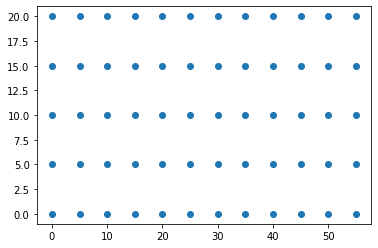

In [11]:
plt.scatter(xmesh,ymesh)       
plt.show ()